In [4]:
!conda activate ctg

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.interpolate import interp1d
import warnings
from typing import List, Optional, Tuple

warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
import sys
sys.path.append('..')

In [19]:
from src.helpers.helpers import load_patient_data, plot_ctg, plot_fhr, plot_fhr_time, load_ctg_npy #,load_ctg_time
from src.constants import DATA_DIR
from src.helpers.preprocess import *
from src.transforms.functional import *

In [20]:
DATA_DIR = '../../data/preprocessed/npy600_all/'
#DATA_DIR = '../../data/preprocessed/npy4features_droppedzeros/'
META_FILE = '../meta.csv'
RESULTS_DIR = '../output/pics'

In [21]:
df_train = pd.read_csv(META_FILE)
patients = df_train['patient'].values
df_train = df_train.drop(['Unnamed: 0'], axis = 1)
# normal
norm = df_train['patient'][df_train['pH'] >= 7.15].values
inter = df_train['patient'][(df_train['pH'] < 7.15) & (df_train['pH'] >= 7.05)].values
pathol = df_train['patient'][df_train['pH'] < 7.05].values
df = df_train.copy()
df.head()

,patient,pH,BDecf,pCO2,BE,Apgar1,Apgar5,Gest. weeks,Weight(g),Sex,...,Induced,I.stage,NoProgress,CK/KP,II.stage,Deliv. type,dbID,Rec. type,Pos. II.st.,target
0,1220,7.30,3.52,6.0,-4.7,9.0,10.0,42.0,3100.0,2.0,...,1.0,165.0,0.0,0.0,15.0,1.0,1051632.0,2.0,14400.0,0
1,1234,7.29,2.50,6.5,-4.2,8.0,9.0,41.0,3200.0,1.0,...,0.0,135.0,0.0,0.0,10.0,1.0,1054195.0,1.0,14400.0,0
2,1208,7.23,5.84,6.6,-7.4,9.0,9.0,40.0,3900.0,2.0,...,0.0,260.0,0.0,0.0,30.0,1.0,1049536.0,12.0,14400.0,0
3,1038,7.33,2.72,5.7,-4.0,10.0,10.0,39.0,2740.0,1.0,...,0.0,15.0,0.0,0.0,10.0,1.0,1002508.0,1.0,14400.0,0
4,1004,7.30,5.19,5.5,-6.4,8.0,9.0,41.0,3370.0,1.0,...,1.0,55.0,0.0,0.0,10.0,1.0,983277.0,12.0,14400.0,0


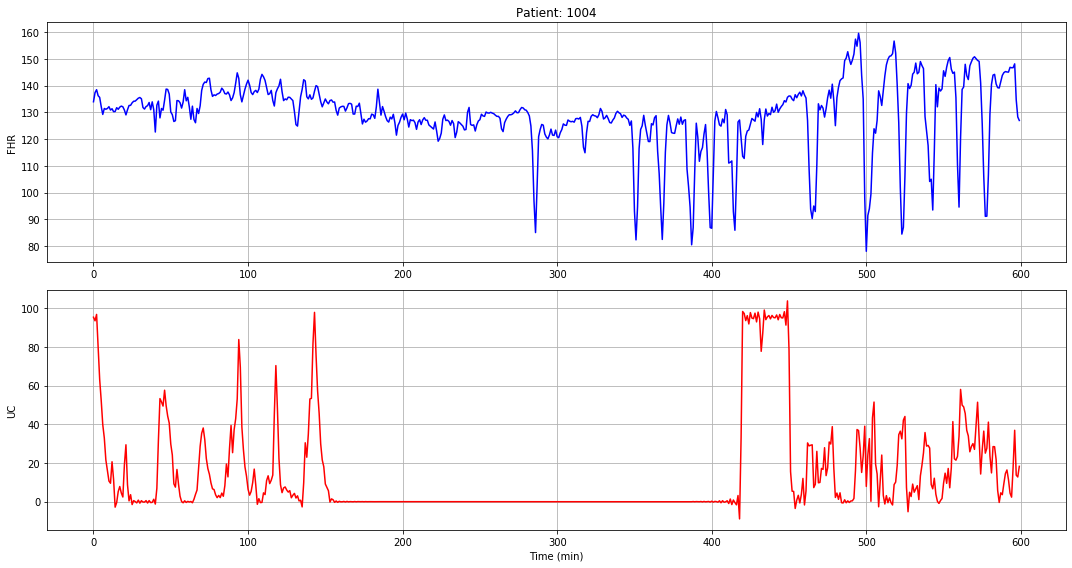

In [39]:
num = 4
patient = patients[num]
fhr, uc, time, y = load_ctg_npy(DATA_DIR, int(patient))
fig = plot_ctg(fhr[0], uc[0], patient_num = patient) 
len(fhr)
fhr = fhr[0]
uc = uc[0]

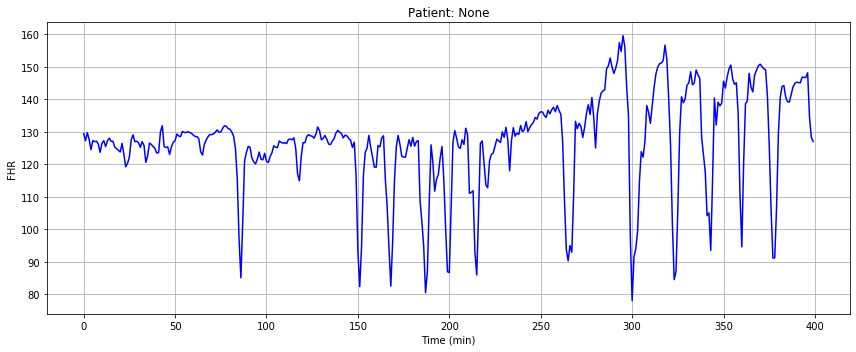

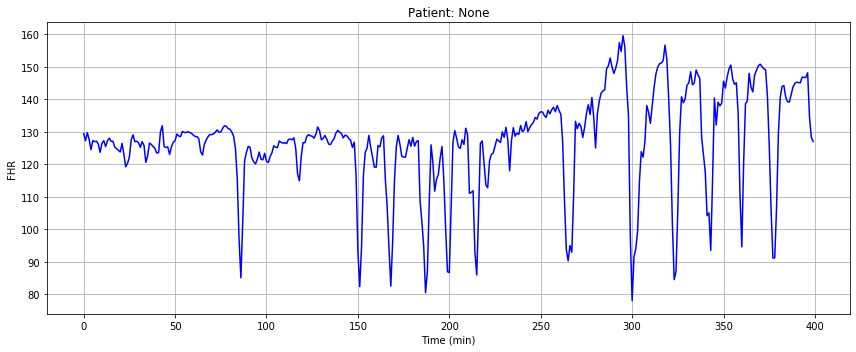

In [40]:
# crops
fhr2 = crop_last(fhr, 400)
plot_fhr(fhr2, 2)

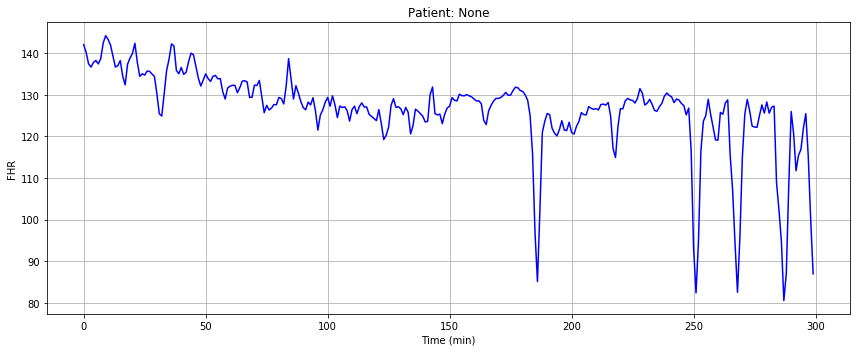

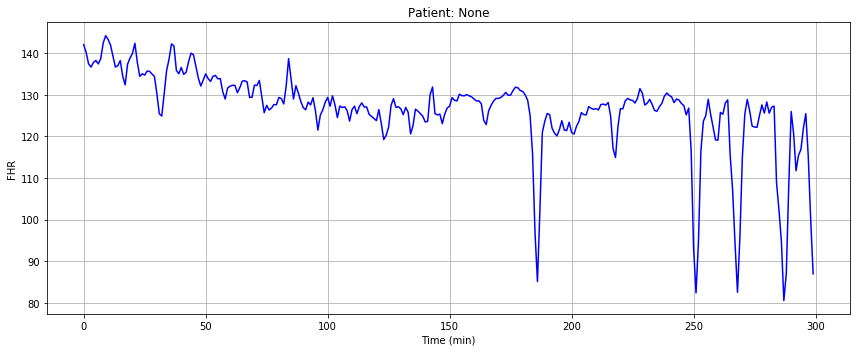

In [42]:
# load from batch
fhr2 = crop_translate(fhr, crop_size = 300, shift = 100) 
plot_fhr(fhr2, 3)

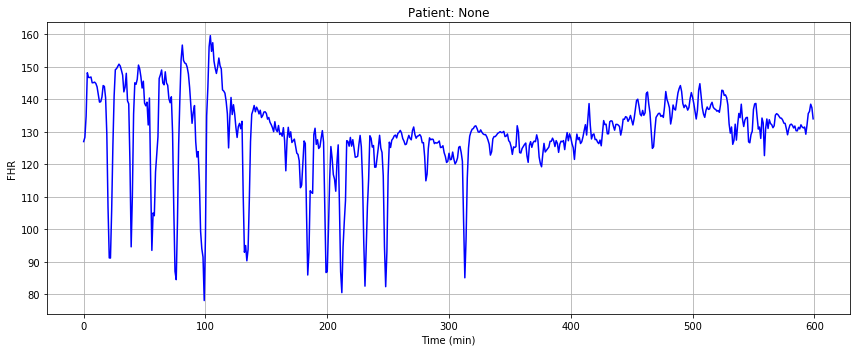

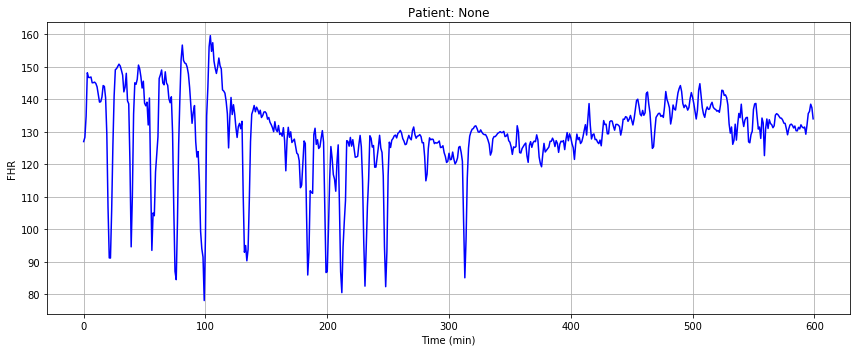

In [43]:
# flips
fhr2 = horizontal_flip(fhr)
plot_fhr(fhr2, 4)

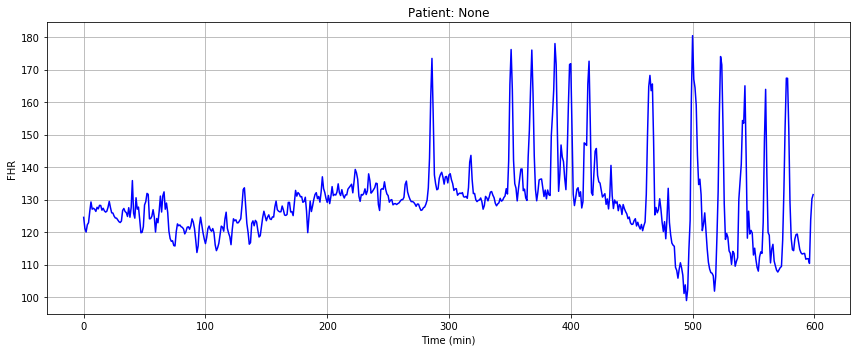

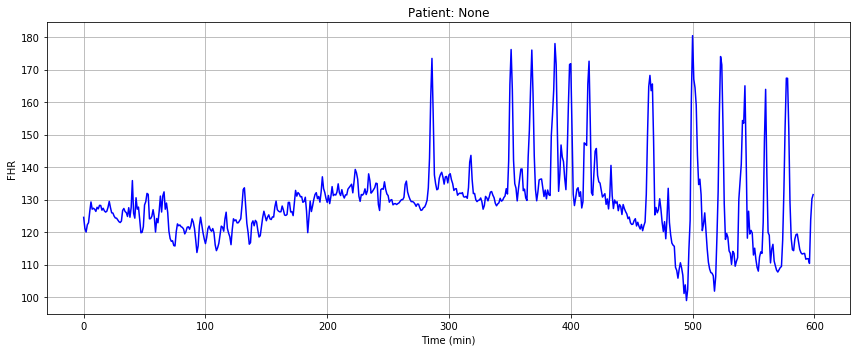

In [44]:
fhr2 = vertical_flip(fhr)
plot_fhr(fhr2, 4)

In [45]:
# shifts
fhr2 = shift_up(fhr, max_shift = 10)
plot_fhr(fhr2, 4)

TypeError: object of type 'numpy.float64' has no len()

In [46]:
fhr2 = shift_down(fhr, 10)
plot_fhr(fhr2, 4)

TypeError: object of type 'numpy.float64' has no len()

Noise 

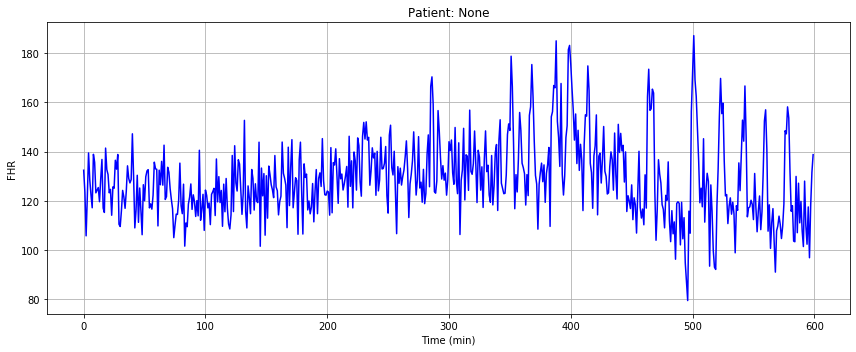

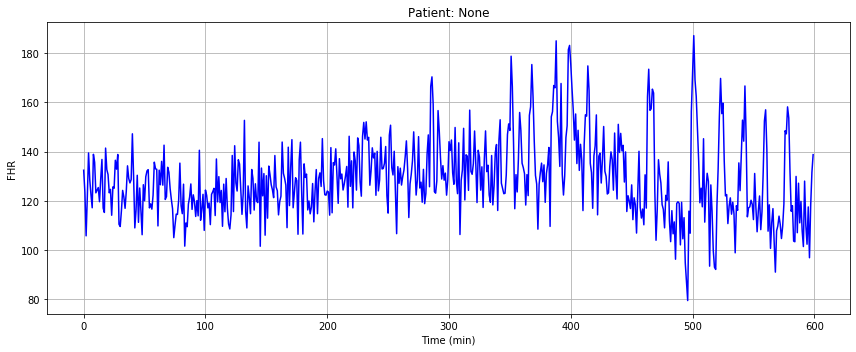

In [51]:
fhr2 =  gauss_noise(fhr2, max_noise=1)
plot_fhr(fhr2, 4)

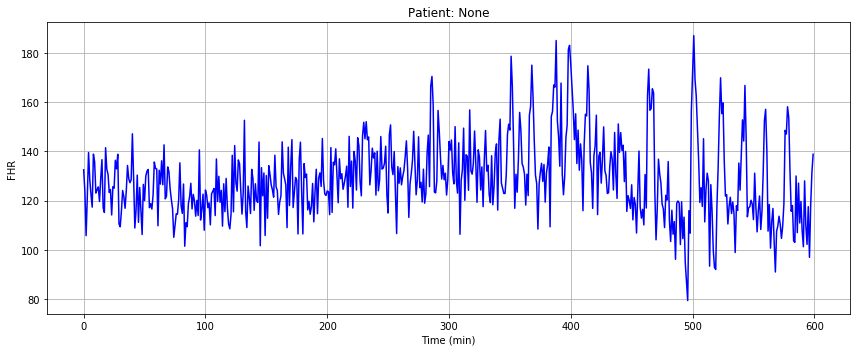

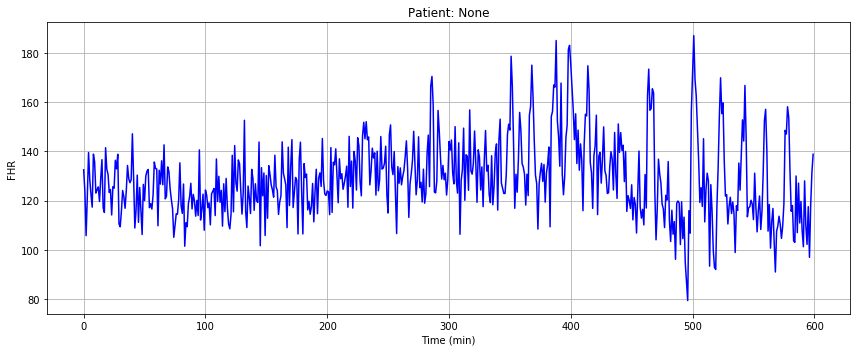

In [52]:
fhr2 =  gauss_noise(fhr2, max_noise=0.1)
plot_fhr(fhr2, 4)